In [113]:
import numpy as np
import matplotlib.pyplot as plt

def electric_field(t, E0, omega0, phi_k):
    return E0 * np.exp(-1j * omega0 * t) * np.sum(np.exp(-1j * phi_k(t)), axis=0)


def coherence(tau, E0, omega0, phi_k, t_samples):
    E_t = electric_field(t_samples, E0, omega0, phi_k)
    E_t_tau = electric_field(t_samples + tau, E0, omega0, phi_k)
    
    numerator = np.mean(np.conj(E_t) * E_t_tau)
    denominator = np.sqrt(np.mean(np.abs(E_t)**2) * np.mean(np.abs(E_t_tau)**2))
    
    g1 = numerator / denominator
    return g1


# Phase shift function for the k-th collision
def phi_k(t):
    return np.random.uniform(-np.pi/64, np.pi/64, size=(len(t), n))

E0 = 1.0
n = 500
omega0 = 2 * np.pi * 1e14  # Angular frequency of the light source (in radians per second)
h = np.linspace(0, 1e-6, n)
c = 3e+8
tau = 2*h/c

tau0 =1e-12 #(( 4*d**2*N)/v)*np.sqrt((np.pi*k*T)/m)



# phi = phi_k
t_samples = np.linspace(0, 1e-10, n)  # Time samples
tau_values = np.linspace(-1e-12, 1e-12, n)  # Range of τ values
phi = phi_k(t_samples)
g1_values = [coherence(tau, E0, omega0, phi_k, t_samples) for tau in tau]
g1_theoretical = np.exp(-1j * omega0 * tau - (tau/tau0))




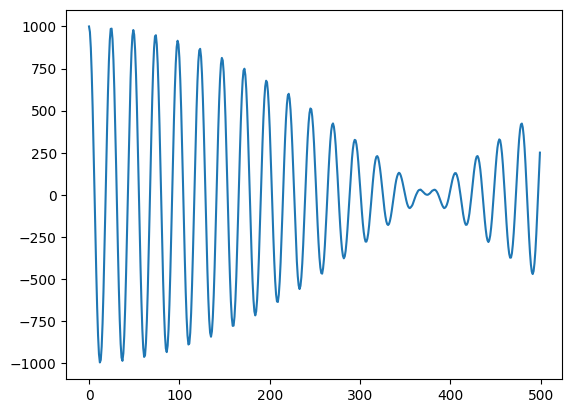

In [114]:

E_t = electric_field(t_samples, E0, omega0, phi_k)
E_t_tau = electric_field(t_samples + tau, E0, omega0, phi_k)
plt.plot(E_t+E_t_tau)

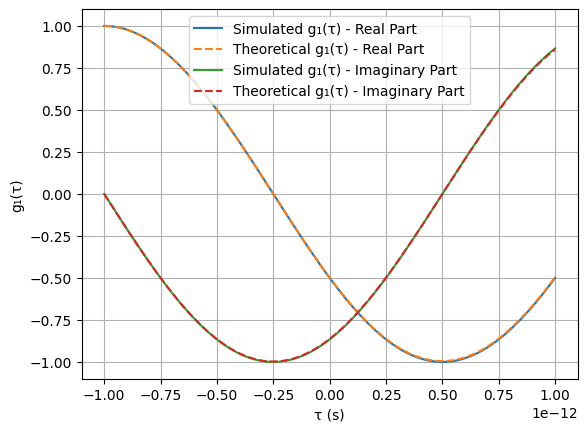

In [115]:
# Compare the simulated and theoretical coherence functions
import matplotlib.pyplot as plt
plt.plot(tau_values, np.real(g1_values), label='Simulated g₁(τ) - Real Part')
plt.plot(tau_values, np.real(g1_theoretical), '--', label='Theoretical g₁(τ) - Real Part')
plt.plot(tau_values, np.imag(g1_values), label='Simulated g₁(τ) - Imaginary Part')
plt.plot(tau_values, np.imag(g1_theoretical), '--', label='Theoretical g₁(τ) - Imaginary Part')
plt.xlabel('τ (s)')
plt.ylabel('g₁(τ)')
plt.legend()
plt.grid(True)
plt.show()